This file does the following:
(1) loads the prepped numpy files from github and merges them.  x_train files are loaded separately and then merged becuase our free github account only allows for 25MB files.
(2) loads the requisite packages
(3) runs a CNN on the images.

In [2]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras import backend as K
import seaborn as sns
sns.set_style('white')
import os
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.python.framework import dtypes
import base64
from PIL import Image
from numpy import array
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(seed=7)
import csv
import pandas as pd
from scipy import ndimage, misc
from sklearn import preprocessing



Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Import in file paths for all the posters

In [5]:
x_train0  = np.load('x_train0.npy')
x_train1  = np.load('x_train1.npy')
x_train2  = np.load('x_train2.npy')
x_train3  = np.load('x_train3.npy')
x_train4  = np.load('x_train4.npy')
x_train5  = np.load('x_train5.npy')
x_train6  = np.load('x_train6.npy')
x_train7  = np.load('x_train7.npy')
x_train8  = np.load('x_train8.npy')
x_train9  = np.load('x_train9.npy')
x_train10  = np.load('x_train10.npy')
x_train11 = np.load('x_train11.npy')
upload_list = [x_train0,x_train1,x_train2,x_train3,x_train4,x_train5,x_train6,x_train7,x_train8,x_train9,x_train10,x_train11]
x_train = np.concatenate((upload_list))
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
x_test = np.load('x_test.npy')
train_meta_data = np.load('train_meta_data.npy')
test_meta_data = np.load('test_meta_data.npy')

In [25]:
#CNN deets
img_rows = x_train.shape[1]
print('image rows:', img_rows)
img_cols = x_train.shape[2]
print('img_cols', img_cols)
epochs = 50
batch_size= 100
num_classes = 11
input_shape = (3,img_rows,img_cols)
print('input shape:', input_shape)

image rows: 150
img_cols 100
input shape: (1, 150, 100)


In [26]:
# create an empty network model
model = Sequential()

# --- input layer ---
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(img_rows,img_cols, 1)))
# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- next layer ---
# we could double the number of filters as max pool made the 
# feature maps much smaller 
# just not doing this to improve runtime
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten for fully connected classification layer
model.add(Flatten())
# note that the 10 is the number of classes we have
# the classes are mutually exclusive so softmax is a good choice
# --- fully connected layer ---
model.add(Dense(64, activation='relu'))
# --- classification ---
model.add(Dense(num_classes, activation='softmax'))

# prints out a summary of the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 146, 96, 16)       416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 23, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25760)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1648704   
_________________________________________________________________
dense_6 (Dense)              (None, 11)                715       
Total para

In [27]:
# this does all necessary compiling. In tensorflow this is much quicker than in theano
# the setup is our basic categorical crossentropy with stochastic gradient decent
# we also specify that we want to evaluate our model in terms of accuracy
sgd = SGD(lr=0.1, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [28]:
# this is now the actual training
# in addition to the training data we provide validation data
# this data is used to calculate the performance of the model over all the epochs
# this is useful to determine when training should stop
# in our case we just use it to monitor the evolution of the model over the training epochs
# if we use the validation data to determine when to stop the training or which model to save, we 
# should not use the test data, but a separate validation set. 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# once training is complete, let's see how well we have done
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: Error when checking model target: expected dense_6 to have shape (None, 11) but got array with shape (5647, 1)

In [ ]:
# here is a visualization of the training process
# typically we gain a lot in the beginning and then
# training slows down
plt.plot(history.history['acc'])
plt.xlabel("epoch")
plt.ylabel("accuracy")

In [14]:
# Look at the weights of the first layer
layer = model.layers[0]
# this actually returns a list 
# first element is W
# second element are all the biases b
weights = layer.get_weights()
# the weights are the number of pixels times the number of filters (hidden units)
print("Shape of W")
print(weights[0].shape)

Shape of W
(5, 5, 1, 16)


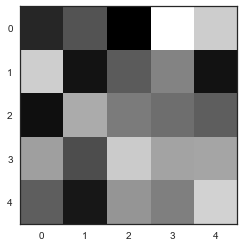

In [15]:
# look at just the first filter
w = weights[0][:,:,0,0]
w = w.reshape((5,5))
plt.imshow(w, cmap='gray')

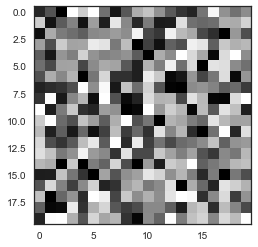

In [16]:
# make a figure for the first 25 filters
filterTiles = np.array([])
index = 0
for i in range(4):
    filterRow = []
    for j in range(4):
        w = weights[0][:,:,0,index]
        w = w.reshape(5,5)
        w = w-np.min(w)
        w = w / np.max(w)
        filterRow.extend(w)
        index+=1
    filterRow = np.array(filterRow)
    if not filterTiles.shape[0] == 0:
        filterTiles = np.hstack([filterTiles, filterRow])
    else:
        filterTiles = filterRow

plt.imshow(filterTiles, cmap='gray')    
plt.show()

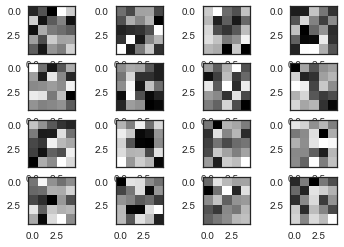

In [17]:
# make a figure for the first 25 filters
index = 0
for i in range(4):
    for j in range(4):
        w = weights[0][:,:,0,index]
        w = w.reshape(5,5)
        index+=1
        plt.subplot(4,4,index)
        plt.imshow(w, cmap='gray')    

plt.show()